# 🤖AI Model Benchmarking: A Data-Driven Exploration🎯  

## 👋Hi, I'm Abhisek! Exploring AI & DS, this notebook compares top AI models across various use cases - from sentiment analysis to image generation. Using Python🐍, I evaluate their strengths, scores, and map them to the right ML task types✨

In [3]:
# Import all necessary libraries
import pandas as pd, difflib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Load & Describe Data
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Brainovision/Python Basics/Pawan Sir/AI_Models_Use_Cases_Details.csv")
print("✅ Dataset Loaded Succesfully:")
df.head()

✅ Dataset Loaded Succesfully:


,AI Model,Use Case,Logic,Reasoning,Coding,Maths,Creativity,Memory,Speed,Accuracy,Comprehension,Multimodal
0,GPT-4,Summarization,9,7,5,6,10,5,5,7,10,9
1,GPT-4,Translation,8,10,5,5,6,7,6,8,7,8
2,GPT-4,Code Generation,7,6,10,10,9,9,10,8,7,9
3,GPT-4,Math Problem Solving,6,7,6,5,5,8,9,6,6,9
4,GPT-4,Text Completion,8,9,6,8,5,8,7,5,6,9


In [5]:
# Display all unique AI Tools & Use Cases in this dataset
print("=" * 153)
print("🤖 AI Tools Used --> " + ', '.join(sorted(df['AI Model'].unique())))
print("-" * 153)
print("🎯 Use Cases --> " + ', '.join(sorted(df['Use Case'].unique())))
print("=" * 153)

🤖 AI Tools Used --> Claude 3, Cohere, Command R+, GPT-4, Gemini 1.5, LLaMA 3, Mistral
---------------------------------------------------------------------------------------------------------------------------------------------------------
🎯 Use Cases --> Chatbot Support, Code Generation, Data Analysis, Email Writing, Financial Forecasting, Game Playing, Image Captioning, Legal Document Review, Math Problem Solving, Medical Diagnosis Support, Question Answering, Recommendation System, Resume Screening, Scientific Research Assistance, Sentiment Analysis, Speech Recognition, Story Writing, Summarization, Text Completion, Translation


In [6]:
# Exploring Column Types
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()
print("=" * 150)
print("                                                           🔍 Column Type Analysis:")
print("=" * 150)
print(f"1. 📁Categorical Columns ({len(cat_cols)}): {cat_cols}")
print(f"2. 📊Numeric Columns ({len(num_cols)}): {num_cols}")

                                                           🔍 Column Type Analysis:
1. 📁Categorical Columns (2): ['AI Model', 'Use Case']
2. 📊Numeric Columns (10): ['Logic ', 'Reasoning ', 'Coding ', 'Maths', 'Creativity', 'Memory ', 'Speed ', 'Accuracy ', 'Comprehension ', 'Multimodal ']


******************************************************************************************************************************************************


🔍 Enter your AI use case (e.g., 'image generation', 'sentiment analysis'):  text


------------------------------------------------------------------------------------------
🎯 Matched Use Case: Text Completion
------------------------------------------------------------------------------------------
🤖 Best AI Model: Cohere
📈 Total Normalized Score: 82.00 / 100
🔝 Strengths: Logic , Reasoning , Maths
🧠 Task Type: SEQUENCE GENERATION


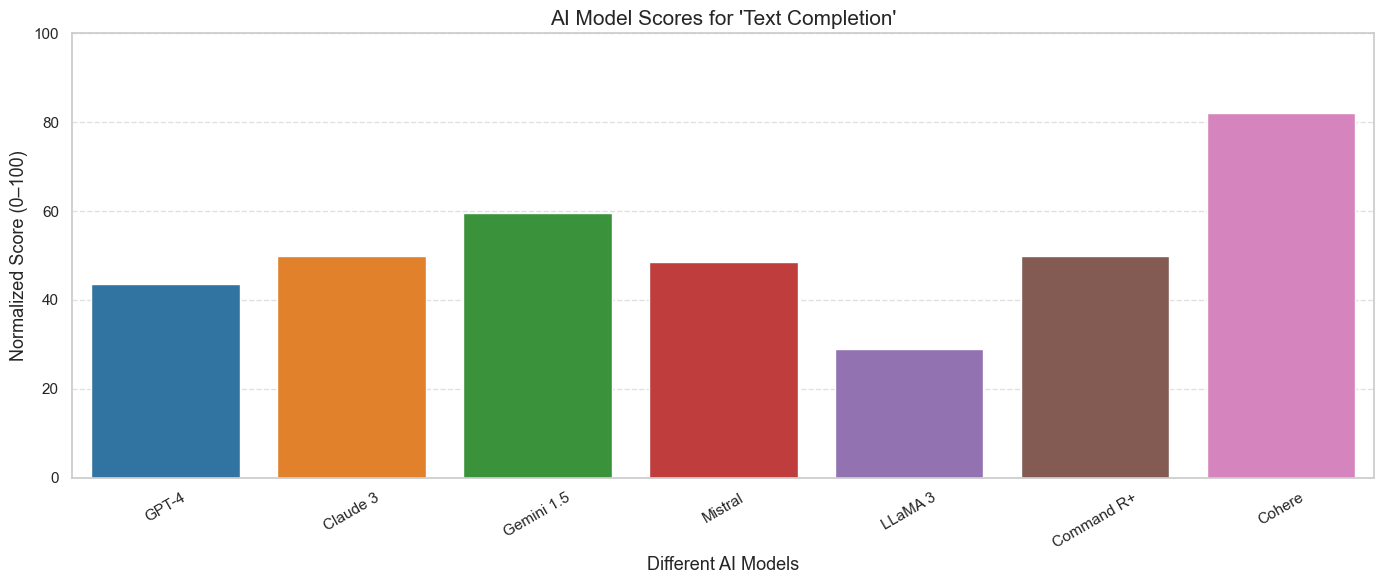

******************************************************************************************************************************************************


In [7]:
# 📥 User Input
print("*" * 150)
query = input("🔍 Enter your AI use case (e.g., 'image generation', 'sentiment analysis'): ").strip().lower()
use_cases = df["Use Case"].str.lower().unique().tolist()
match = difflib.get_close_matches(query, use_cases, n=1, cutoff=0.3)

if not match:
    print("❌ No close match found.")
else:
    use_case = match[0]
    print("-" * 90)
    print(f"🎯 Matched Use Case: {use_case.title()}")
    print("-" * 90)
    
    # 🔍 Filter Data for Matched Use Case
    sub = df[df["Use Case"].str.lower() == use_case].copy()
    bench_cols = [c for c in sub.columns if c not in ["AI Model", "Use Case"]]

    # 📊 Normalize Scores
    sub[bench_cols] = MinMaxScaler().fit_transform(sub[bench_cols])
    sub["Total Score"] = sub[bench_cols].sum(axis=1) * 10

    # 🥇 Best Model & Top 3 Strengths
    best = sub.loc[sub["Total Score"].idxmax()]
    top3 = best[bench_cols].sort_values(ascending=False).head(3).index.tolist()

    # 🧠 ML Task Type Detection
    task_map = {
        "Classification": ["classification", "classify", "sentiment", "spam", "emotion", "topic", "toxicity", "language detection", "object classification"],
        "Regression": ["regression", "forecast", "prediction", "price", "sales", "demand", "stock", "weather", "age", "score"],
        "Clustering": ["clustering", "cluster", "segmentation", "grouping", "topic modeling", "community"],
        "Sequence Generation": ["generation", "completion", "caption", "language modeling", "summarization", "translation", "story", "text generation", "question"]
    }

    task_type = "Unknown"
    for task, keywords in task_map.items():
        if any(k in use_case.lower() for k in keywords):
            task_type = task
            break

    # 📋 Final Output Summary
    print(f"🤖 Best AI Model: {best['AI Model']}")
    print(f"📈 Total Normalized Score: {best['Total Score']:.2f} / 100")
    print(f"🔝 Strengths: {', '.join(top3)}")
    print(f"🧠 Task Type: {task_type.upper()}")

    # 📊 Visualization
    sns.set(style="whitegrid")
    plt.rcParams.update({'figure.figsize': (14, 6), 'axes.titlesize': 16, 'axes.labelsize': 13})
    sns.barplot(data=sub, x="AI Model", y="Total Score", hue="AI Model", palette="tab10", legend=False)
    plt.title(f"AI Model Scores for '{use_case.title()}'", fontsize=15)
    plt.xlabel("Different AI Models")
    plt.ylabel("Normalized Score (0–100)")
    plt.ylim(0, 100)
    plt.xticks(rotation=30)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    print("*" * 150)

### ✅ Summary
#### 1. Built an interactive AI model benchmarking tool 🚀
#### 2. Automatically identifies best model for any use case 🤖
#### 3. Visualizes model performance with bold, colorful charts 📊
#### 4. Detects the correct ML task type intelligently 🧠

#### 🙌 Follow for more real-world AI + Data Science projects!